### The models are compared

In this code, the scores of each model are loaded, making it vary based on the dataset used for training. The scores are mainly based on the f1_score which for each training was calculated on the performance of the test set.

The final aim is to identify which model performs best and in which type of dataset and then we subsequently studied which features are selected by the models. These selections are the result of the optimized choice of hyperparameters

In [1]:
# Import the useful libraries for this code, 
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plus we also import useful functions from the tools library
from tools import extract_feature_model_dataset, extract_scores_model_dataset, extract_scores_model_voting, get_models

['isolation_forest', 'random_forest', 'xgboost', 'knn']
[{'dataset': ['STATIONARITY', 'RESIDUAL', 'SPREAD', 'DIFF_TIME', 'EWS'], 'f1_score': [0.4807692307692308, 0.3950617283950617, 0.594059405940594, 0.43956043956043955, 0.43956043956043955]}, {'dataset': ['STATIONARITY', 'RESIDUAL', 'SPREAD', 'DIFF_TIME', 'EWS'], 'f1_score': [0.8200000000000001, 0.7073170731707318, 0.8247422680412372, 0.8505747126436781, 0.8]}, {'dataset': ['STATIONARITY', 'RESIDUAL', 'SPREAD', 'DIFF_TIME', 'EWS'], 'f1_score': [0.7843137254901961, 0.7901234567901234, 0.8113207547169813, 0.8695652173913044, 0.7961165048543689]}, {'dataset': ['STATIONARITY', 'RESIDUAL', 'SPREAD', 'DIFF_TIME', 'EWS'], 'f1_score': [0.7843137254901961, 0.5581395348837209, 0.7619047619047619, 0.7843137254901961, 0.7884615384615384]}]


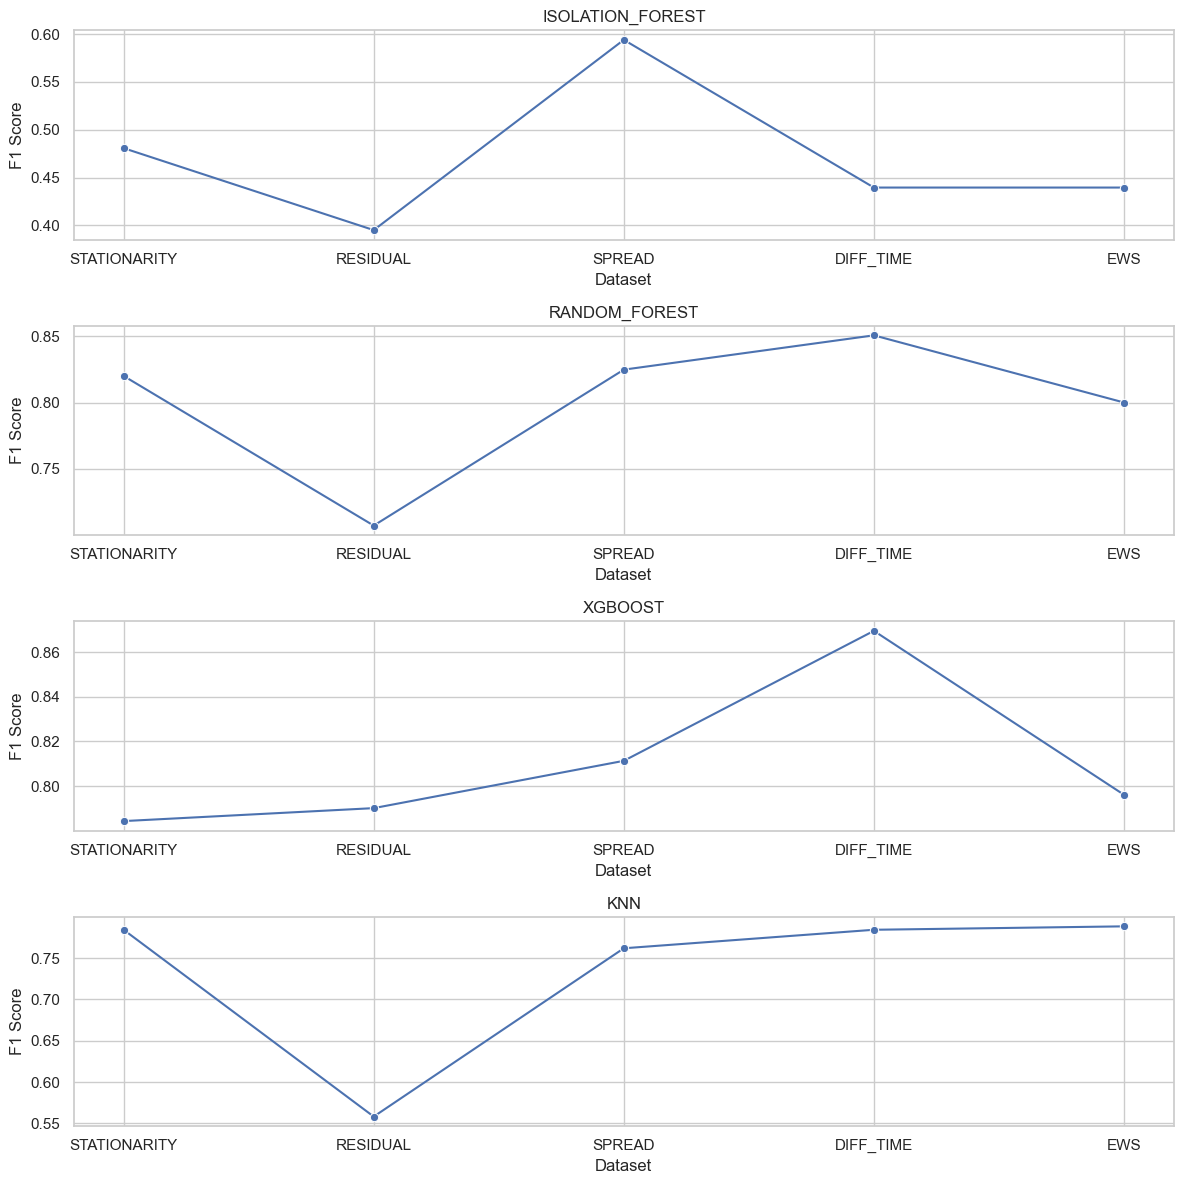

In [2]:
# In this section we load the scores of each model from the settings file as the dataset 
# varies with the aim of seeing the general performance at a glance
file_path = "./settings_models.json"
models, datasets, votings = get_models(file_path)

print(models)

scores = []

for model in models:
    # load the scores of the model over datasets
    scores.append(extract_scores_model_dataset(file_path, model))

print(scores)

plt.figure(figsize=(12, 3 * len(models)))
sns.set(style="whitegrid")

# So for each model we create the plot of the scores over the datasets
for i in range(0, len(models)):
    plt.subplot(len(models), 1, i+1)
    data = pd.DataFrame(scores[i])
    sns.lineplot(x='dataset', y='f1_score', data=data, marker='o')
    plt.title(models[i].upper())
    plt.xlabel('Dataset')
    plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

# How we can see the all models perform better on the dataset data

               Model       Dataset  F1_Score
0   isolation_forest  STATIONARITY  0.480769
1   isolation_forest      RESIDUAL  0.395062
2   isolation_forest        SPREAD  0.594059
3   isolation_forest     DIFF_TIME  0.439560
4   isolation_forest           EWS  0.439560
5      random_forest  STATIONARITY  0.820000
6      random_forest      RESIDUAL  0.707317
7      random_forest        SPREAD  0.824742
8      random_forest     DIFF_TIME  0.850575
9      random_forest           EWS  0.800000
10           xgboost  STATIONARITY  0.784314
11           xgboost      RESIDUAL  0.790123
12           xgboost        SPREAD  0.811321
13           xgboost     DIFF_TIME  0.869565
14           xgboost           EWS  0.796117
15               knn  STATIONARITY  0.784314
16               knn      RESIDUAL  0.558140
17               knn        SPREAD  0.761905
18               knn     DIFF_TIME  0.784314
19               knn           EWS  0.788462


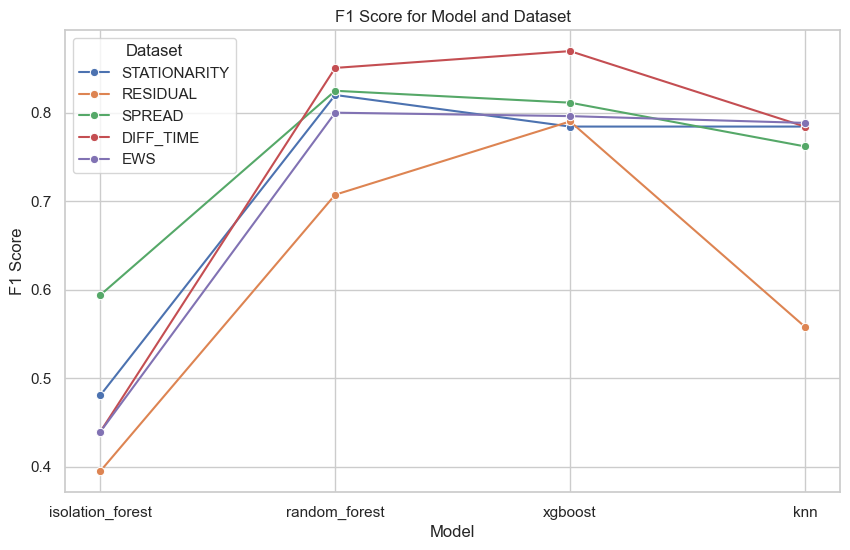

In [3]:
# Now let's put all the graphs described above 
# in a single graph so as to see everything clearly in a single graph
model_names = []
dataset_names = []
f1_scores = []

for i, model in enumerate(models):
    model_names.extend([model] * len(scores[i]['dataset']))
    dataset_names.extend(scores[i]['dataset'])
    f1_scores.extend(scores[i]['f1_score'])

# Create a DataFrame
data = pd.DataFrame({
    'Model': model_names,
    'Dataset': dataset_names,
    'F1_Score': f1_scores
})

print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='F1_Score', hue='Dataset', data=data, marker='o')
plt.title('F1 Score for Model and Dataset')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

# CONSIDARATIONS:
# Therefore, from the performances that can be seen from this graph, we decide to use a final model that aggregates 
# six models using a voting system: we take the two best datasets for each model, excluding isolation forest (it does not perform well).

# We then create a separate model with xgboost driven on the DIFF_TIME dataset as this dataset requires predicting
# the next day's asset price. So we add it aside from a perspective of pure classification or even application value but 
# it would require reconstructing the future price of the assets (possible with statistical or machine learning models)

[{'dataset': 'STATIONARITY', 'columns': ['Coint_ECSURPUS_VIX', 'Coint_USGG30YR_GTDEM30Y', 'Coint_USGG30YR_GTDEM10Y', 'Coint_USGG30YR_LUMSTRUU', 'Coint_USGG30YR_LMBITR', 'Coint_USGG30YR_LUACTRUU', 'Coint_USGG30YR_LF98TRUU', 'Coint_USGG30YR_LG30TRUU', 'Coint_USGG30YR_LP01TREU', 'Coint_USGG30YR_EMUSTRUU', 'Coint_USGG30YR_LF94TRUU', 'Coint_USGG30YR_MXIN', 'Coint_GT10_EONIA', 'Coint_GT10_LF94TRUU', 'Coint_USGG2YR_USGG3M', 'Coint_GTDEM30Y_LMBITR', 'Coint_GTDEM30Y_LF98TRUU', 'Coint_GTDEM30Y_LG30TRUU', 'Coint_GTDEM30Y_LP01TREU', 'Coint_GTDEM30Y_EMUSTRUU', 'Coint_GTDEM10Y_LF98TRUU', 'Coint_GTDEM10Y_LG30TRUU', 'Coint_GTDEM10Y_LP01TREU', 'Coint_GTDEM10Y_EMUSTRUU', 'Coint_GTDEM2Y_EONIA', 'Coint_GTJPY30YR_GTGBP30Y', 'Coint_GTJPY30YR_LF98TRUU', 'Coint_GTGBP20Y_LF98TRUU', 'Coint_GTGBP20Y_LG30TRUU', 'Coint_GTGBP20Y_LP01TREU'], 'weights': [0.22528563572596094, 0.0676781289528626, 0.03366769924139842, 0.02446368093105112, 0.022862621474927708, 0.025695086486493438, 0.029919142378711867, 0.01904514731602

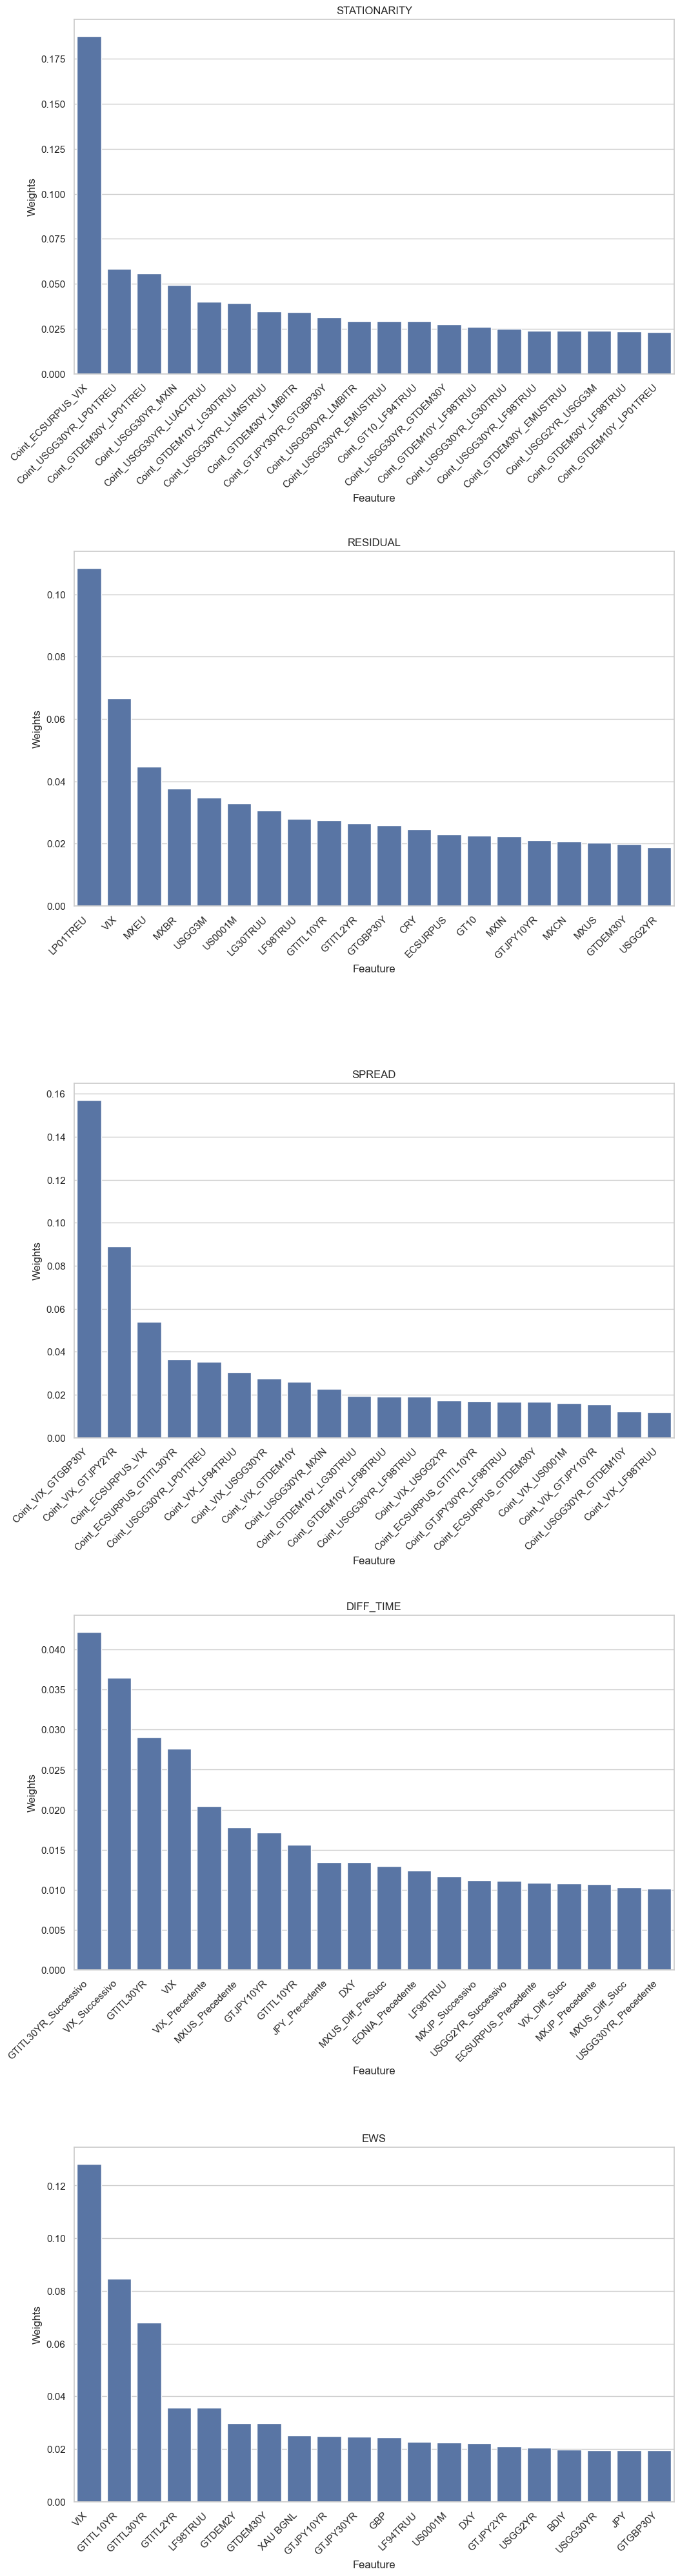

In [4]:
# Here the main purpose is to see which features are actually 
# used and with what weight by the random forest model compared to the datasets

file_path = "./settings_models.json"

models = ["random_forest", "xgboost"]

data_feature = []

for model_name in models:
    data_feature.append(extract_feature_model_dataset(file_path, model_name))

# We extract the feature selection of the random forest over the datasets
print(data_feature[0])

plt.figure(figsize=(12, 10 * len(datasets)))
sns.set(style="whitegrid")

for i in range(0, len(datasets)):

    # Extraction of columns and weights
    columns = data_feature[1][i]["columns"]
    weights = data_feature[1][i]["weights"]

    # Creating a list of tuples (column, weight)
    column_weights = list(zip(columns, weights))

    # Sorting the list based on the weights in descending order
    sorted_column_weights = sorted(column_weights, key=lambda x: x[1], reverse=True)

    # Extraction of the first 20 columns with the highest weights
    top_20_columns = sorted_column_weights[:20]

    # Separation of columns and weights into separate lists
    top_20_columns_names = [col for col, weight in top_20_columns]
    top_20_weights = [weight for col, weight in top_20_columns]

    data = {
        'Feauture': top_20_columns_names,
        'Weights': top_20_weights
    }

    df = pd.DataFrame(data)

    plt.subplot(len(datasets), 1, i+1)
    # Create the bar chart
    sns.barplot(x='Feauture', y='Weights', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(data_feature[0][i]["dataset"])
    plt.xlabel('Feauture')
    plt.ylabel('Weights')
    plt.subplots_adjust(hspace=0.5)

plt.show()
